# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed, as well as Scikit-Learn ≥0.20. You don't need to change any code in the following cell, just run it.

In [274]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Read the dataset 

In [264]:
# fields are separated by comma and skip the first row (titles) when reading
data = np.loadtxt("hw03_data.txt", skiprows=1, dtype = "float", delimiter=",")

# Scale the data with sklearn StandardScaler
# Write your code here

# create instance of StandardScaler
scaler = sklearn.preprocessing.StandardScaler()

# fit and scale the data
scaled_data = scaler.fit_transform(data)

# Designate scaled and unscaled X/y values
X = scaled_data[:, [0]]
y = scaled_data[:, [1]]
X_unscaled = data[:, [0]]
y_unscaled = data[:, [1]]

# Visualize the dataset

Saving figure generated_data_plot


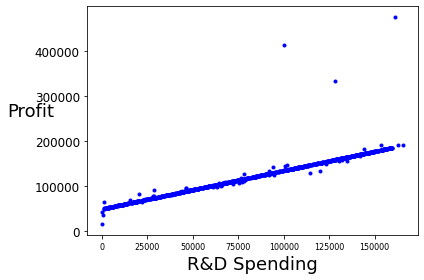

In [265]:
# Write your code here

# Generate a plot of the original data
plt.plot(X_unscaled, y_unscaled, "b.")
plt.xlabel("R&D Spending", fontsize=18)
plt.ylabel("Profit", rotation=0, fontsize=18)
plt.xticks(fontsize=8)
save_fig("generated_data_plot")
plt.show()

# Training with scikit_learn Linear Regression 



In [266]:
# Write your code here

# Import the train test split
from sklearn.model_selection import train_test_split

# Train Test Split, 80/20, setting random state to 42 to be consitent with the lab
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

# Import Linear Regression
from sklearn.linear_model import LinearRegression

# Create a linear regression instance
regressor = LinearRegression()

# Train against the training set of data
regressor.fit(X_train, y_train)

LinearRegression()

# Prediction
Now we can make predictions using the weights.

In [267]:
# Write your code here

# create a prediction set from the X test points
y_pred = regressor.predict(X_test)

# Get values of intercept and coefficient
regressor.intercept_, regressor.coef_

(array([-0.00115483]), array([[0.94421415]]))

# Evaluation
Best possible $R^{2}$ score  is 1.0. <br>

In [268]:
# Calculating the R squared value
# Write your code here

# compute the R-Squared value using Y prediction vs Y Test points
sklearn.metrics.r2_score(y_test, y_pred)

0.9134554891584079

# Linear regression using gradient descent
Solve the same problem with gradient descent algorithm

In [269]:
#Randomly generate starting weights
weight = np.random.randn(2,1) 

# Add x0 = 1 for each instance
X_train_b = np.c_[np.ones((800, 1)), X_train]

# Set the learning rate
alpha = 0.2

# Define the number of iterations
n_iterations = 1000

# Set m to the size of the training data
m = len(X_train_b)

# Run for iterations
for iteration in range(n_iterations):
    
    # Calulate the gradients
    gradients = 1/m * X_train_b.T.dot(X_train_b.dot(weight) - y_train)
    
    # Update the Weights
    weight = weight - alpha * gradients

Print out the weight values

In [270]:
# Print the weights
print(weight)

[[-0.00115483]
 [ 0.94421415]]


Calculate the prediction for the test set

In [271]:
# Add x0 = 1 for each test point
X_test_b = np.c_[np.ones((200, 1)), X_test]

# Run the dot product to predict the values
y_predict = X_test_b.dot(weight)

Calculate the R Squared Value

In [272]:
# Calulcate the score
sklearn.metrics.r2_score(y_test, y_pred)

0.9134554891584079

$R^{2}$ Analysis and reasoning:
    
While the value of $R^{2}$ is higher than in the prompt(around 0.80), it can be improved. The values were already scaled, so it shouldn't be due to a magnitude difference between X and Y. Upon looking at the data visualization, there are significant outliers visible in the plot from the beginning of the exercise. These outliers could be making the R-Square value lower since they are significantly far away from the trend of the data. My solution would be to normalize the data to the least amount of deviations. To do this, the data should be normalized to L1. To fully demonstrate the difference, any values used above have had an _n appended to them for readability and to ensure no data from the rest of the journal is being used in any way aside from the initial scaled_data variable. At the end, the $R^{2}$ is printed and should be significantly better.

Improve the $R^{2}$ Value

In [273]:
# Normalize the data to L1
normalized_data = sklearn.preprocessing.normalize(scaled_data, norm='l1')

# Split data into X and Y
X_norm = normalized_data[:, [0]]
y_norm = normalized_data[:, [1]]

# Create the train/test splits
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_norm, y_norm, test_size = 0.20, random_state = 42)

# Randomly generate starting weights
weight = np.random.randn(2,1)  

# Add x0 = 1 for each instance
X_train_b_n = np.c_[np.ones((800, 1)), X_train_n]

# Set the learning rate
alpha = 0.2

# Define the number of iterations
n_iterations = 1000

# Set m to the size of the training data
m = len(X_train_b_n)

# Run for iterations
for iteration in range(n_iterations):
    
    # Calulate the gradients
    gradients = 1/m * X_train_b_n.T.dot(X_train_b_n.dot(weight) - y_train_n)
    
    # Update the Weights
    weight = weight - alpha * gradients

# Add x0 = 1 for each test point
X_test_b_n = np.c_[np.ones((200, 1)), X_test_n]

# Run the dot product to predict the values
y_predict_n = X_test_b_n.dot(weight)

# Calulcate the score
print(sklearn.metrics.r2_score(y_test_n, y_predict_n))

0.9723542455003182
